# Link Google Colab
[Google Colab](https://colab.research.google.com/drive/1-JCr0nURFDD2zsWoGHq3f4E5J6cIVqlf?usp=sharing)

# References
- https://pycaret.gitbook.io/docs/learn-pycaret/official-blog/time-series-forecasting-with-pycaret-regression
- https://pycaret.gitbook.io/docs/learn-pycaret/official-blog/time-series-101-for-beginners
- https://pycaret.readthedocs.io/en/latest/api/time_series.html
- https://pycaret.readthedocs.io/en/latest/api/time_series.html#pycaret.time_series.compare_models
- https://pycaret.readthedocs.io/en/stable/api/regression.html


 # Install Libraries

In [ ]:
!pip install --upgrade scalecast
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.4 MB/s eta 0:00:00
  Created wheel for scalecast: filename=SCALECAST-0.19.9-py3-none-any.whl size=125805 sha256=396cfc2821fa9a5ca554fd48224a35f194cc4ed5cebc16d3cfef73be537ea4a9
  Stored in directory: /root/.cache/pip/wheels/c0/63/02/3dfe5b5cbdbffd10136943e110b6937714f71cb3047a48d0e5
Successfully built scalecast
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.3/917.3 kB 35.1 MB/s

In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*find_spec.*")
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Import Libraries

In [ ]:
import pandas as pd
from scalecast.Forecaster import Forecaster
from scalecast import GridGenerator
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Data Understanding

## Download and Load Data

In [ ]:
!wget https://github.com/hilmizr/world_fertilizer_price/raw/master/01-09-24-modified_fertilizer_datav5.xlsx

--2024-09-01 05:46:39--  https://github.com/hilmizr/world_fertilizer_price/raw/master/01-09-24-modified_fertilizer_datav5.xlsx
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hilmizr/world_fertilizer_price/master/01-09-24-modified_fertilizer_datav5.xlsx [following]
--2024-09-01 05:46:39--  https://raw.githubusercontent.com/hilmizr/world_fertilizer_price/master/01-09-24-modified_fertilizer_datav5.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42737 (42K) [application/octet-stream]
Saving to: ‘01-09-24-modified_fertilizer_datav5.xlsx’

01-09-24-modified_f 100%[===================>]  41.74K  

In [ ]:
date_col = 'date'
target_col = 'dap_price'

In [ ]:
data = pd.read_excel('01-09-24-modified_fertilizer_datav5.xlsx')
data[date_col] = pd.to_datetime(data[date_col])
data = data[[date_col, target_col]]
data.head()

,date,dap_price
0,1993-11-01,140.40
1,1993-12-01,150.38
2,1994-01-01,150.00
3,1994-02-01,151.75
4,1994-03-01,155.88


# Quick Code
https://scalecast.readthedocs.io/en/latest/index.html

## Single Model

In [ ]:
n_test = 6

In [ ]:
GridGenerator.get_example_grids()

In [ ]:
f = Forecaster(
   y = data[target_col],
   current_dates = data[date_col],
   future_dates = n_test,
   test_length = n_test,
   cis = False,
   metrics = ['rmse','mae','mape','r2'],
)
f.set_estimator('xgboost')
f.auto_Xvar_select()
f.cross_validate(k=3)
f.auto_forecast()

In [ ]:
results = f.export(['lvl_fcsts','model_summaries'])

In [ ]:
# Display the relevant metrics
summaries = results['model_summaries']
display(summaries[[
    'ModelNickname',
    'HyperParams',
    'InSampleRMSE',
    'InSampleMAE',
    'InSampleMAPE',
    'InSampleR2',
    'TestSetRMSE',
    'TestSetMAE',
    'TestSetMAPE',
    'TestSetR2'
]])

,ModelNickname,HyperParams,InSampleRMSE,InSampleMAE,InSampleMAPE,InSampleR2,TestSetRMSE,TestSetMAE,TestSetMAPE,TestSetR2
0,xgboost,"{'n_estimators': 150, 'scale_pos_weight': 5, '...",14.21688,6.294439,0.016723,0.994393,51.66358,43.037953,0.072733,-2.267543


# Basic Univariate Forecasting

In [ ]:
from scalecast.Forecaster import Forecaster
f = Forecaster(
    y = data[target_col],
    current_dates = data[date_col],
    future_dates = n_test,
)
f

Forecaster(
    DateStartActuals=1993-11-01T00:00:00.000000000
    DateEndActuals=2024-04-01T00:00:00.000000000
    Freq=MS
    N_actuals=366
    ForecastLength=6
    Xvars=[]
    TestLength=0
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

## Data Understanding

### Exploratory Data Analysis (EDA)

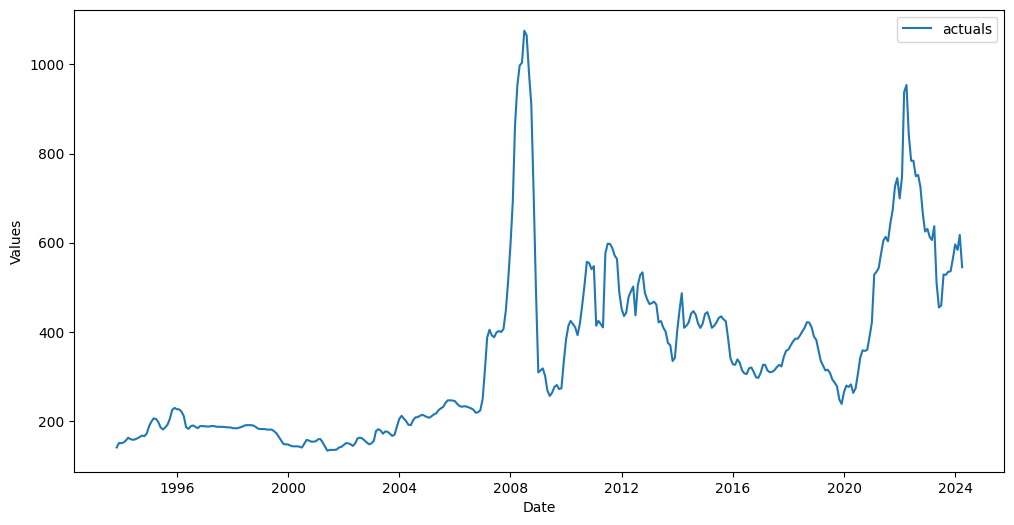

In [ ]:
f.plot()
plt.show()

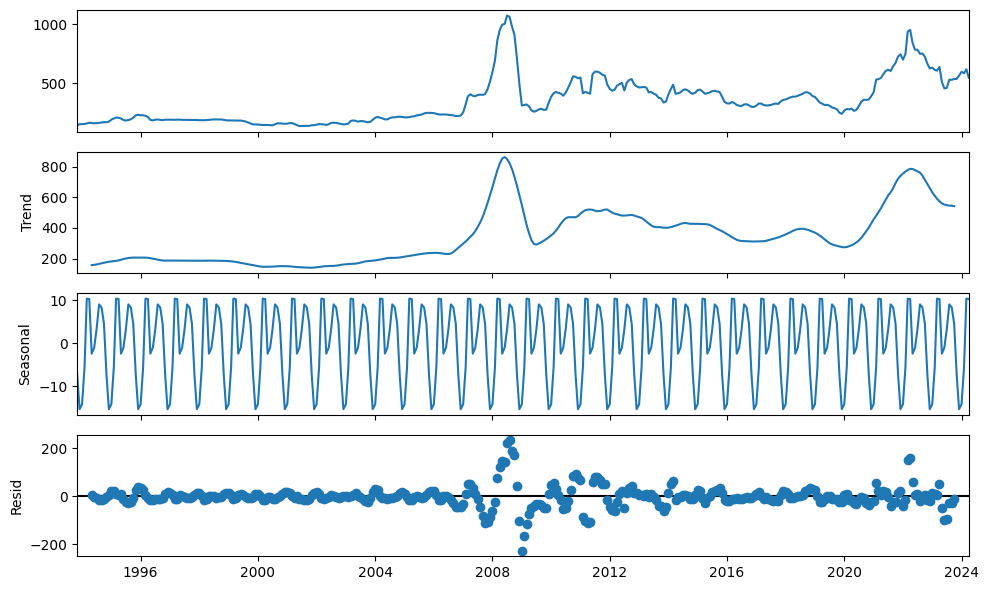

In [ ]:
plt.rc("figure",figsize=(10,6))
f.seasonal_decompose().plot()
plt.show()

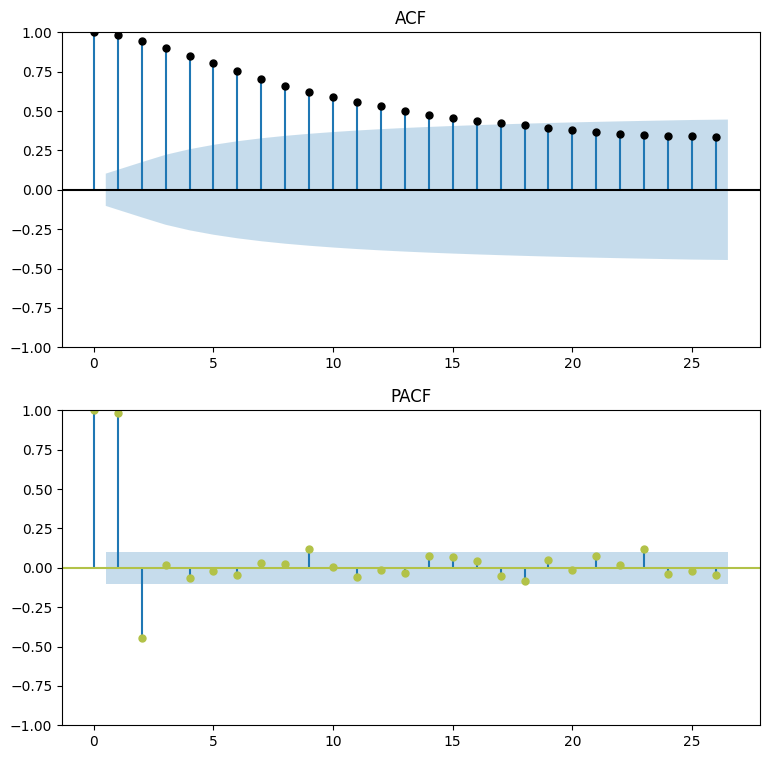

In [ ]:
figs, axs = plt.subplots(2, 1,figsize=(9,9))
f.plot_acf(ax=axs[0],title='ACF',lags=26,color='black')
f.plot_pacf(ax=axs[1],title='PACF',lags=26,color='#B2C248',method='ywm')
plt.show()

### Set Test Length

In [ ]:
f.set_test_length(n_test)

## Data Preparation

### Feature Engineering

In [ ]:
# Add Trend
f.add_time_trend()

# Add Seasonality
f.add_seasonal_regressors('month',raw=False,sincos=True)

# Add Autoregressive (AR) Terms/Lag Variables
f.add_ar_terms(12)

f

Forecaster(
    DateStartActuals=1993-11-01T00:00:00.000000000
    DateEndActuals=2024-04-01T00:00:00.000000000
    Freq=MS
    N_actuals=366
    ForecastLength=6
    Xvars=['t', 'monthsin', 'monthcos', 'AR1', 'AR2', 'AR3', 'AR4', 'AR5', 'AR6', 'AR7', 'AR8', 'AR9', 'AR10', 'AR11', 'AR12']
    TestLength=6
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

## Modeling

### Linear Scikit-Learn

In [ ]:
f.set_estimator('mlr')
f.manual_forecast(dynamic_testing=n_test)

In [ ]:
f.set_estimator('lasso')
f.manual_forecast(alpha=0.2,dynamic_testing=n_test)

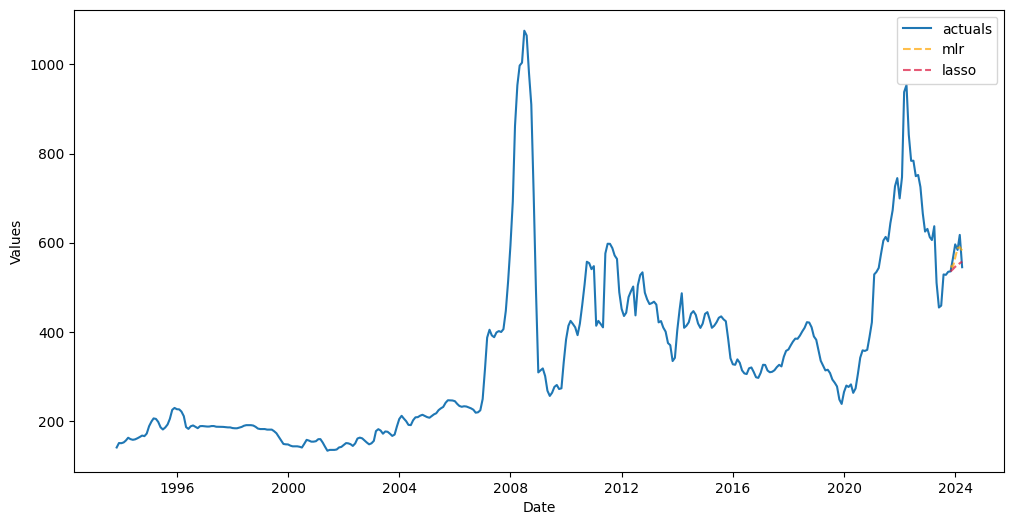

In [ ]:
f.plot_test_set(models=['mlr','lasso'],order_by='TestSetMAPE')
plt.show()

### Non-linear Scikit-Learn

In [ ]:
f.set_estimator('rf')
f.manual_forecast(max_depth=2,dynamic_testing=13)

In [ ]:
f.set_estimator('xgboost')
f.manual_forecast(gamma=1,dynamic_testing=13)

In [ ]:
f.set_estimator('knn')
f.manual_forecast(n_neighbors=5,dynamic_testing=13)

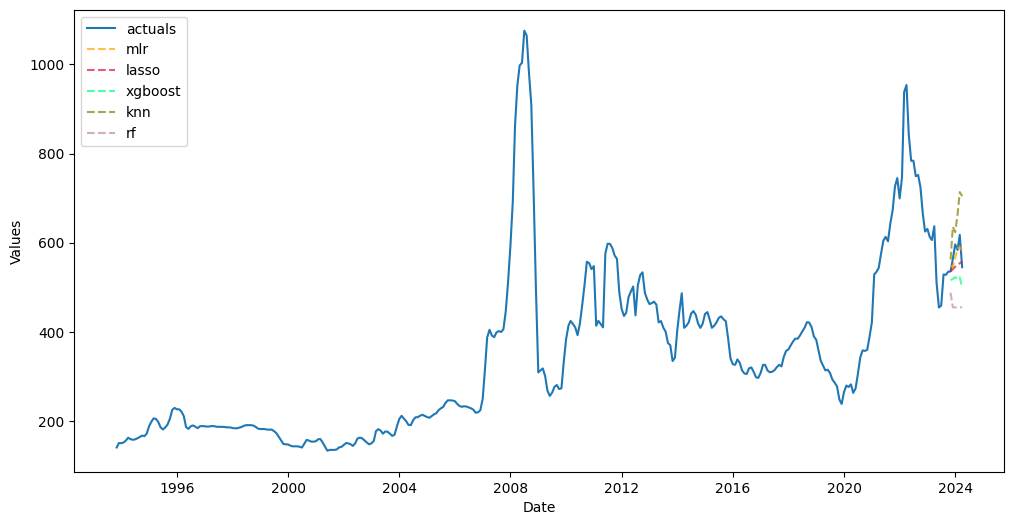

In [ ]:
f.plot_test_set(
    models=['mlr','lasso','rf','xgboost', 'knn'],
    order_by='TestSetMAPE'
)
plt.show()

### ARIMA

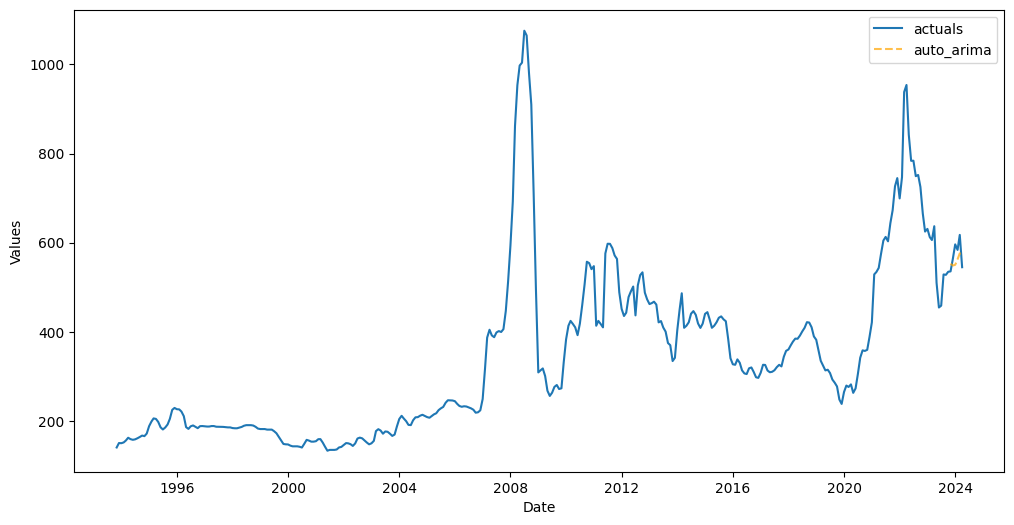

In [ ]:
from scalecast.auxmodels import auto_arima
auto_arima(f,m=n_test)
f.plot_test_set(models='auto_arima')
plt.show()

### Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1msp7a0h/gpzr6ggk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1msp7a0h/uo57xjg5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55733', 'data', 'file=/tmp/tmp1msp7a0h/gpzr6ggk.json', 'init=/tmp/tmp1msp7a0h/uo57xjg5.json', 'output', 'file=/tmp/tmp1msp7a0h/prophet_model1u6h8mqo/prophet_model-20240901054836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:48:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:48:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing

This is a future version incompatibilit

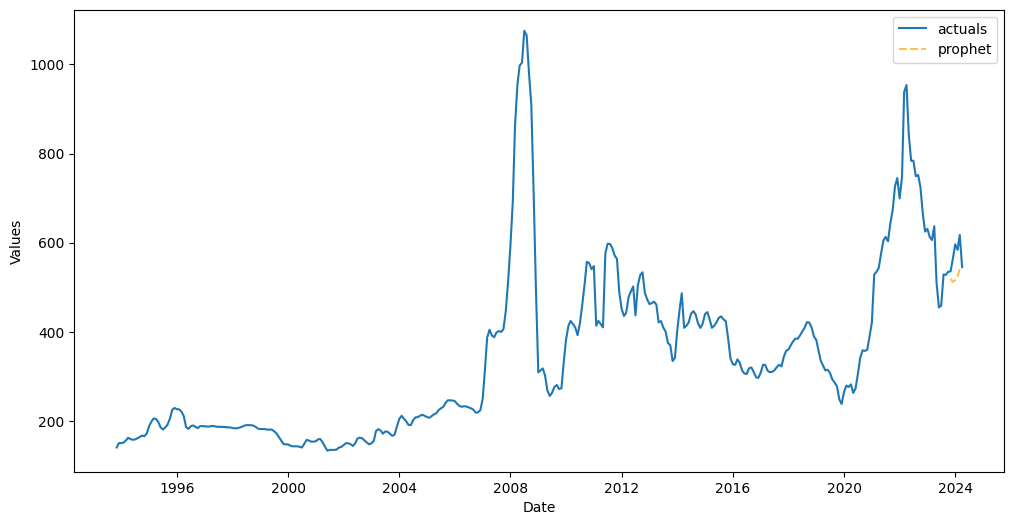

In [ ]:
f.set_estimator('prophet')
f.manual_forecast()
f.plot_test_set(models='prophet')
plt.show()

### TBATS

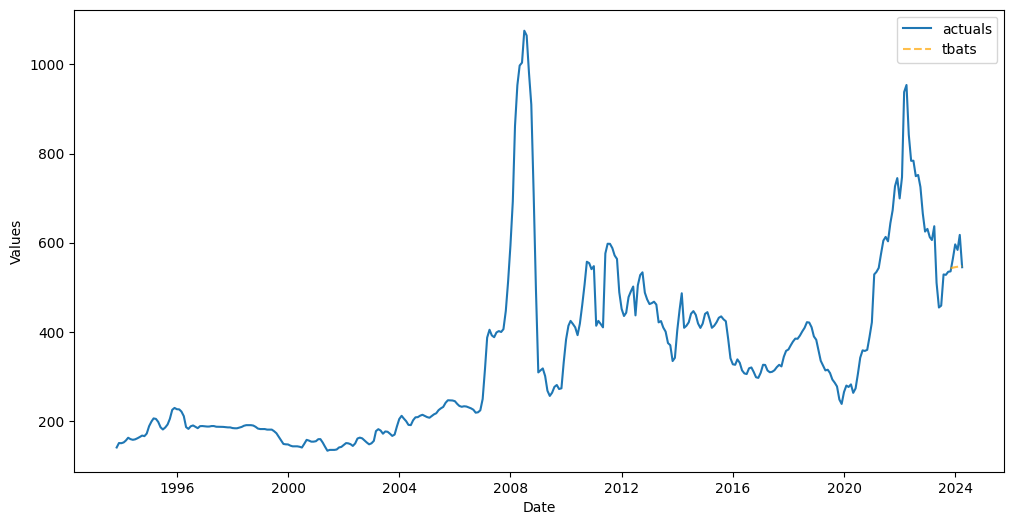

In [ ]:
f.set_estimator('tbats')
f.manual_forecast()
f.plot_test_set(models='tbats')
plt.show()

## Evaluasi

In [ ]:
# List of all models you've used
models = ['mlr', 'lasso', 'rf', 'xgboost', 'knn', 'auto_arima', 'prophet', 'tbats']

# Export the model summaries
results = f.export(['model_summaries'])
results

,ModelNickname,Estimator,Xvars,HyperParams,Observations,DynamicallyTested,TestSetLength,CILevel,ValidationMetric,ValidationMetricValue,...,weights,best_model,InSampleRMSE,InSampleMAPE,InSampleMAE,InSampleR2,TestSetRMSE,TestSetMAPE,TestSetMAE,TestSetR2
0,mlr,mlr,"[t, monthsin, monthcos, AR1, AR2, AR3, AR4, AR...",{},366,6,6,NaN,NaN,NaN,...,NaN,True,29.930160,0.041864,16.411682,0.975161,24.470224,0.037979,21.776992,0.266959
1,lasso,lasso,"[t, monthsin, monthcos, AR1, AR2, AR3, AR4, AR...",{'alpha': 0.2},366,6,6,NaN,NaN,NaN,...,NaN,False,32.524107,0.045673,17.681787,0.970669,37.502909,0.051757,30.679223,-0.721798
2,rf,rf,"[t, monthsin, monthcos, AR1, AR2, AR3, AR4, AR...",{'max_depth': 2},366,13,6,NaN,NaN,NaN,...,NaN,False,49.609996,0.107113,35.413608,0.931758,119.208313,0.194777,113.251460,-16.396640
3,xgboost,xgboost,"[t, monthsin, monthcos, AR1, AR2, AR3, AR4, AR...",{'gamma': 1},366,13,6,NaN,NaN,NaN,...,NaN,False,0.979626,0.002597,0.724822,0.999973,62.253874,0.098223,57.371749,-3.744441
4,knn,knn,"[t, monthsin, monthcos, AR1, AR2, AR3, AR4, AR...",{'n_neighbors': 5},366,13,6,NaN,NaN,NaN,...,NaN,False,38.869843,0.070496,25.241079,0.958107,89.053935,0.134561,76.812000,-8.708643
5,auto_arima,arima,[],"{'order': (3, 1, 2), 'seasonal_order': (1, 0, ...",366,1,6,NaN,NaN,NaN,...,NaN,False,30.676533,0.040604,15.910041,0.973894,30.924153,0.049236,28.566601,-0.170706
6,prophet,prophet,[],{},366,1,6,NaN,NaN,NaN,...,NaN,False,144.036267,0.300242,98.490672,0.424746,55.911165,0.081425,47.916045,-2.826920
7,tbats,tbats,None,{},366,1,6,NaN,NaN,NaN,...,NaN,False,31.166017,0.038068,15.902522,0.973055,39.786798,0.052902,31.457345,-0.937895


In [ ]:
# Select the relevant metrics
metrics_to_show = [
    'ModelNickname',
    'InSampleRMSE', 'TestSetRMSE',
    'InSampleMAE', 'TestSetMAE',
    'InSampleMAPE', 'TestSetMAPE',
    'InSampleR2', 'TestSetR2'
]

# Display the comparison table
comparison = results[results['ModelNickname'].isin(models)][metrics_to_show]
comparison_sorted = comparison.sort_values('TestSetMAPE')
display(comparison_sorted)

,ModelNickname,InSampleRMSE,TestSetRMSE,InSampleMAE,TestSetMAE,InSampleMAPE,TestSetMAPE,InSampleR2,TestSetR2
0,mlr,29.930160,24.470224,16.411682,21.776992,0.041864,0.037979,0.975161,0.266959
5,auto_arima,30.676533,30.924153,15.910041,28.566601,0.040604,0.049236,0.973894,-0.170706
1,lasso,32.524107,37.502909,17.681787,30.679223,0.045673,0.051757,0.970669,-0.721798
7,tbats,31.166017,39.786798,15.902522,31.457345,0.038068,0.052902,0.973055,-0.937895
6,prophet,144.036267,55.911165,98.490672,47.916045,0.300242,0.081425,0.424746,-2.826920
3,xgboost,0.979626,62.253874,0.724822,57.371749,0.002597,0.098223,0.999973,-3.744441
4,knn,38.869843,89.053935,25.241079,76.812000,0.070496,0.134561,0.958107,-8.708643
2,rf,49.609996,119.208313,35.413608,113.251460,0.107113,0.194777,0.931758,-16.396640


# Automated Univariate Pipeline

In [ ]:
from scalecast import GridGenerator
from scalecast.Pipeline import Transformer, Reverter, Pipeline
from scalecast.util import find_optimal_transformation

In [ ]:
GridGenerator.get_example_grids(overwrite=True)

In [ ]:
f_pipe_aut = Forecaster(
    y = data[target_col],
    current_dates = data[date_col],
    future_dates = n_test,
)
f_pipe_aut.set_test_length(n_test)
f_pipe_aut

Forecaster(
    DateStartActuals=1993-11-01T00:00:00.000000000
    DateEndActuals=2024-04-01T00:00:00.000000000
    Freq=MS
    N_actuals=366
    ForecastLength=6
    Xvars=[]
    TestLength=6
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

In [ ]:
def forecaster_aut(f,models):
    f.auto_Xvar_select(
        estimator='elasticnet',
        monitor='TestSetMAPE',
        alpha=0.2,
        irr_cycles = [26],
    )
    f.tune_test_forecast(
        models,
        cross_validate=True,
        k=3,
        # dynamic tuning = 13 means we will hopefully find a model that is optimized to predict 13 steps
        dynamic_tuning=n_test,
        dynamic_testing=n_test,
    )
    f.set_estimator('combo')
    f.manual_forecast()

In [ ]:
transformer_aut, reverter_aut = find_optimal_transformation(
    f_pipe_aut,
    lags = 12,
    m = 'auto',
    monitor = 'mape',
    estimator = 'elasticnet',
    alpha = 0.2,
    test_length = n_test,
    num_test_sets = 3,
    space_between_sets = 4,
    verbose = True,
)

Using elasticnet model to find the best transformation set on 3 test sets, each 6 in length.
All transformation tries will be evaluated with 12 lags.
Last transformer tried:
[]
Score (mape): 0.13137770065567794
--------------------------------------------------
Last transformer tried:
[('DetrendTransform', {'loess': True})]
Score (mape): 0.11370929902815878
--------------------------------------------------
Last transformer tried:
[('DetrendTransform', {'poly_order': 1})]
Score (mape): 0.09054892052485801
--------------------------------------------------
Last transformer tried:
[('DetrendTransform', {'poly_order': 2})]
Score (mape): 0.08771765916565848
--------------------------------------------------
Last transformer tried:
[('DetrendTransform', {'poly_order': 2}), ('DeseasonTransform', {'m': 12, 'model': 'add'})]
Score (mape): 0.10186230155740211
--------------------------------------------------
Last transformer tried:
[('DetrendTransform', {'poly_order': 2}), ('DiffTransform', 1)

[[1.66645801+0.j 1.65795692+0.j 1.65001624+0.j ... 1.64166779+0.j
  1.65135707+0.j 1.59431734+0.j]
 [1.65363061+0.j 1.66645801+0.j 1.65795692+0.j ... 1.64380861+0.j
  1.64166779+0.j 1.65135707+0.j]
 [1.67456465+0.j 1.65363061+0.j 1.66645801+0.j ... 1.6584291 +0.j
  1.64380861+0.j 1.64166779+0.j]
 ...
 [1.80489307+0.j 1.80004376+0.j 1.8319506 +0.j ... 1.90430589+0.j
  1.90263145+0.j 1.86866232+0.j]
 [1.78384979+0.j 1.80489307+0.j 1.80004376+0.j ... 1.88894585+0.j
  1.90430589+0.j 1.90263145+0.j]
 [1.77376496+0.j 1.78384979+0.j 1.80489307+0.j ... 1.87705027+0.j
  1.88894585+0.j 1.90430589+0.j]]



Last transformer tried:
[('DetrendTransform', {'poly_order': 2}), ('RobustScaleTransform',)]
Score (mape): 0.06881077443726784
--------------------------------------------------
Final Selection:
[('DetrendTransform', {'poly_order': 2}), ('RobustScaleTransform',)]


ElasticNet does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
[[ 9.99249288+0.j  9.69443318+0.j  9.42910178+0.j ...  9.1628258 +0.j
   9.47305654+0.j  7.85992348+0.j]
 [ 9.54836447+0.j  9.99249288+0.j  9.69443318+0.j ...  9.22991771+0.j
   9.1628258 +0.j  9.47305654+0.j]
 [10.29122764+0.j  9.54836447+0.j  9.99249288+0.j ...  9.71059956+0.j
   9.22991771+0.j  9.1628258 +0.j]
 ...
 [18.50157835+0.j 18.00437697+0.j 21.80252507+0.j ... 39.79985672+0.j

In [ ]:
pipeline_aut = Pipeline(
    steps = [
        ('Transform',transformer_aut),
        ('Forecast',forecaster_aut),
        ('Revert',reverter_aut),
    ]
)

f_pipe_aut = pipeline_aut.fit_predict(
    f_pipe_aut,
    models=[
        'mlr',
        'xgboost',
        'knn',
    ],
)

In [ ]:
f_pipe_aut

Forecaster(
    DateStartActuals=1993-11-01T00:00:00.000000000
    DateEndActuals=2024-04-01T00:00:00.000000000
    Freq=MS
    N_actuals=366
    ForecastLength=6
    Xvars=['AR1', 'AR2', 'AR3', 'AR4']
    TestLength=6
    ValidationMetric=rmse
    ForecastsEvaluated=['mlr', 'xgboost', 'knn', 'combo']
    CILevel=None
    CurrentEstimator=combo
    GridsFile=Grids
)

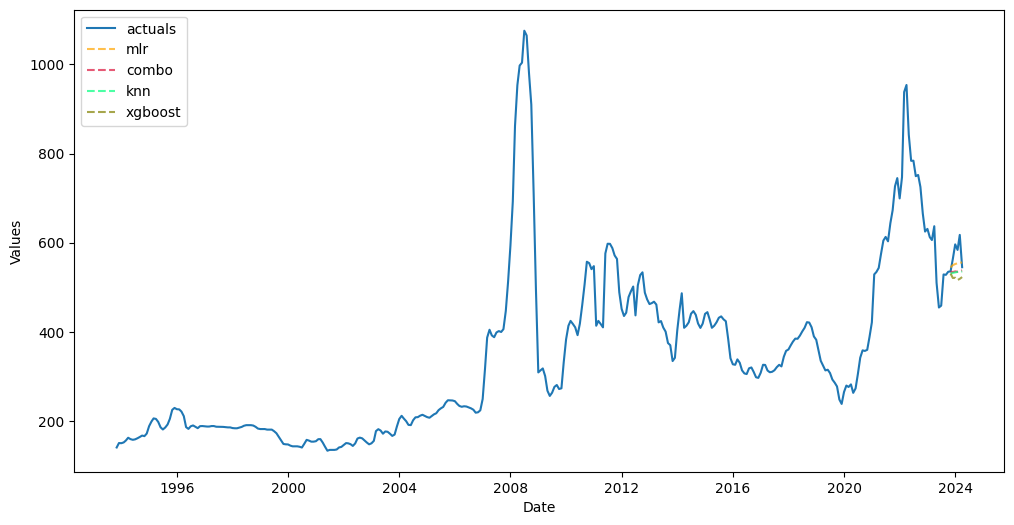

In [ ]:
f_pipe_aut.plot_test_set(order_by='TestSetMAPE')
plt.show()

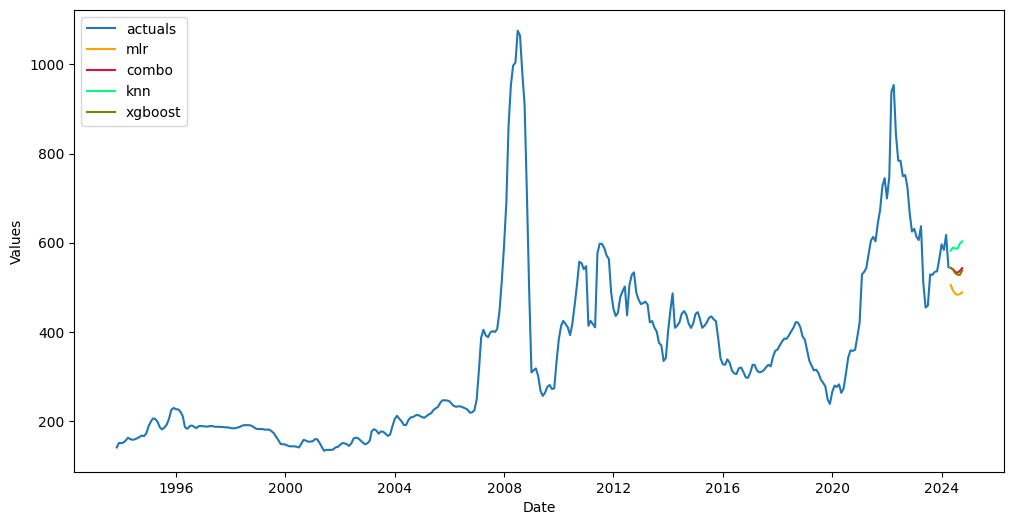

In [ ]:
f_pipe_aut.plot(order_by='TestSetMAPE')
plt.show()

In [ ]:
# Display metrics for all models in the pipeline
results = f_pipe_aut.export(['model_summaries'])
metrics_to_show = [
    'ModelNickname',
    'InSampleRMSE', 'TestSetRMSE',
    'InSampleMAE', 'TestSetMAE',
    'InSampleMAPE', 'TestSetMAPE',
    'InSampleR2', 'TestSetR2'
]

comparison = results[results['ModelNickname'].isin(['mlr', 'xgboost', 'knn', 'combo'])][metrics_to_show]
comparison_sorted = comparison.sort_values('TestSetMAPE')
display(comparison_sorted)

,ModelNickname,InSampleRMSE,TestSetRMSE,InSampleMAE,TestSetMAE,InSampleMAPE,TestSetMAPE,InSampleR2,TestSetR2
0,mlr,30.540189,34.501462,16.363611,28.373319,0.041085,0.047952,0.974111,-0.457227
3,combo,26.939052,47.658808,14.139247,38.010075,0.034223,0.063932,0.979856,-1.780601
2,knn,61.015702,49.024928,29.439152,40.292425,0.067057,0.067996,0.896663,-1.942295
1,xgboost,4.703271,60.916862,4.684193,51.866261,0.018148,0.087873,0.999386,-3.542839
